Start by copying this into your Google Drive!!

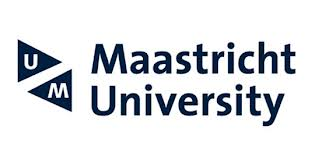


# Faculty of Science and Engineering - Department of Advanced Computer Sciences Course Advanced Natural Language Processing (ANLP) - Tutorial Tokenization

By Jan Scholtes

Welcome to the tutorial on statistical methods in NLP. In this notebook you will learn how we can overcome some of the limitations of traditional, grammar-based approaches (dealing with ambiguity, but also with wrong spelling or wrong grammatical use of words and other unexpected situations).

This will help you understand why statistical and deep-learning methods are so much better for many of the NLP tasks we discuss in this course.

In this notebook, we will use the Stanford NLTK library.

Hidden Markov Models (HMMs) largely used to assign the correct label sequence
to sequential data or assess the probability of a given label and data
sequence. These models are finite state machines characterised by a number of
states, transitions between these states, and output symbols emitted while in
each state. The HMM is an extension to the Markov chain, where each state
corresponds deterministically to a given event. In the HMM the observation is
a probabilistic function of the state. HMMs share the Markov chain's
assumption, being that the probability of transition from one state to another
only depends on the current state - i.e. the series of states that led to the
current state are not used. They are also time invariant.

The HMM is a directed graph, with probability weighted edges (representing the
probability of a transition between the source and sink states) where each
vertex emits an output symbol when entered. The symbol (or observation) is
non-deterministically generated. For this reason, knowing that a sequence of
output observations was generated by a given HMM does not mean that the
corresponding sequence of states (and what the current state is) is known.
This is the 'hidden' in the hidden markov model.

Formally, a HMM can be characterised by:

- the output observation alphabet. This is the set of symbols which may be
  observed as output of the system.
- the set of states.
- the transition probabilities *a_{ij} = P(s_t = j | s_{t-1} = i)*. These
  represent the probability of transition to each state from a given state.
- the output probability matrix *b_i(k) = P(X_t = o_k | s_t = i)*. These
  represent the probability of observing each symbol in a given state.
- the initial state distribution. This gives the probability of starting
  in each state.

To ground this discussion, take a common NLP application, part-of-speech (POS)
tagging. An HMM is desirable for this task as the highest probability tag
sequence can be calculated for a given sequence of word forms. This differs
from other tagging techniques which often tag each word individually, seeking
to optimise each individual tagging greedily without regard to the optimal
combination of tags for a larger unit, such as a sentence. The HMM does this
with the Viterbi algorithm, which efficiently computes the optimal path
through the graph given the sequence of words forms.

In POS tagging the states usually have a 1:1 correspondence with the tag
alphabet - i.e. each state represents a single tag. The output observation
alphabet is the set of word forms (the lexicon), and the remaining three
parameters are derived by a training regime. With this information the
probability of a given sentence can be easily derived, by simply summing the
probability of each distinct path through the model. Similarly, the highest
probability tagging sequence can be derived with the Viterbi algorithm,
yielding a state sequence which can be mapped into a tag sequence.

This discussion assumes that the HMM has been trained. This is probably the
most difficult task with the model, and requires either Maximum Likelihood Estimation (MLE) estimates of the
parameters or unsupervised learning using the Baum-Welch algorithm, a variant
of Entropy Modeling (EM).

Let's start training a HMM model and takeit from there...

# Hidden Markov Models



Training a HMM model for POS tagging

First import probability FreqDist

We will use the Penn treebank corpus in the NLTK data to train the HMM tagger. To import the treebank use the following code:

In [3]:
# install requirements
!pip install python-crfsuite
!pip install sklearn-crfsuite


In [4]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [5]:
from nltk.probability import FreqDist

Let's take a look at the distribution of tags in the corpus

In [6]:
fd = FreqDist()
for word, tag in treebank.tagged_words():
    fd[tag] += 1
fd.items()

dict_items([('NNP', 9410), (',', 4886), ('CD', 3546), ('NNS', 6047), ('JJ', 5834), ('MD', 927), ('VB', 2554), ('DT', 8165), ('NN', 13166), ('IN', 9857), ('.', 3874), ('VBZ', 2125), ('VBG', 1460), ('CC', 2265), ('VBD', 3043), ('VBN', 2134), ('-NONE-', 6592), ('RB', 2822), ('TO', 2179), ('PRP', 1716), ('RBR', 136), ('WDT', 445), ('VBP', 1321), ('RP', 216), ('PRP$', 766), ('JJS', 182), ('POS', 824), ('``', 712), ('EX', 88), ("''", 694), ('WP', 241), (':', 563), ('JJR', 381), ('WRB', 178), ('$', 724), ('NNPS', 244), ('WP$', 14), ('-LRB-', 120), ('-RRB-', 126), ('PDT', 27), ('RBS', 35), ('FW', 4), ('UH', 3), ('SYM', 1), ('LS', 13), ('#', 16)])

We need to import the HMM module as well, using the following code:

In [7]:
from nltk.tag import hmm

We can instantiate a HMM-Trainer object and assign it to a trainer variable using:

In [8]:
trainer = hmm.HiddenMarkovModelTrainer()

We can investigate the tagged words in the corpus:

In [9]:
treebank.tagged_words()[:10]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

The following function returns the first two tagged sentences from the corpus:

In [10]:
treebank.tagged_sents()[:2]


[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')]]

In [11]:
print("Total tagged sentences: ")
print(len(treebank.tagged_sents()))

Total tagged sentences: 
3914


Supervised training maximising the joint probability of the symbol and
state sequences. This is done via collecting frequencies of
transitions between states, symbol observations while within each
state and which states start a sentence. These frequency distributions
are then normalised into probability estimates, which can be
smoothed if desired.

It is also possible to train the HMM unsupervised. We will get back to that later in the Entropy Modeling section.

The NLTK HMM-module offers supervised and unsupervised training methods. Here we train an HMM using a supervised (or Maximum Likelihood Estimate) method:

In [12]:
tagger = trainer.train_supervised(treebank.tagged_sents())

What is in the tagger?

In [13]:
tagger

<HiddenMarkovModelTagger 46 states and 12408 output symbols>

Using a HMM model for POS tagging. First load a tokenizer from NLTK

In [14]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
word_tokenize("Today is a good day.")

['Today', 'is', 'a', 'good', 'day', '.']

Next, load the tokenized structure into the HMM tagger

In [16]:
tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN'),
 ('.', '.'),
 ('Yesterday', 'NN'),
 ('was', 'VBD'),
 ('also', 'RB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('day', 'NN')]

Let's take a look at the probability of this sequence.

In [17]:
tagger.probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

1.5441272451891009e-34

As we discussed, probabilities can become very small, resulting in a floating point under flow. This is why we aften use log probability.

In [18]:
tagger.log_probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

-112.31876358208815

In [19]:
tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

[('Jan', 'NNP'),
 ('Scholtes', 'NNP'),
 ('is', 'NNP'),
 ('a', 'NNP'),
 ('name', 'NNP'),
 ('that', 'NNP'),
 ('does', 'NNP'),
 ('not', 'NNP'),
 ('occur', 'NNP'),
 ('in', 'NNP'),
 ('the', 'NNP'),
 ('corpus', 'NNP'),
 ('.', 'NNP'),
 ('What', 'NNP'),
 ('do', 'NNP'),
 ('you', 'NNP'),
 ('observe', 'NNP'),
 ('?', 'NNP'),
 ('Can', 'NNP'),
 ('you', 'NNP'),
 ('explain', 'NNP'),
 ('?', 'NNP')]

In [20]:
tagger.probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

0.0

In [21]:
tagger.log_probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

-2.100000000000001e+301

#Exercise 1:

a) Why does the log probability not suffer from floating point underflows?

b) Why can the sentence "Jan Scholtes ....." not be POS tagged by this HMM tagger?

c) Can you investigate the probability and log probability of a word sequence (observation sequence) and that of a state (POS tag) sequences?

d) How can we validate the quality of the HMM tagger?

e) Can you print the names of the 46 hidden states and the 12408 output sysmbols (observations) to understand what the mdoel is capable of??

YOUR ANSWERs HERE

name: Parand Mohri - i6234307

a) Probabilities are numbers between 0 and 1 so by multiplying them we just get smaller and smaller numbers, and can result in a floating point under flow. The logarithm function helps this issue because it transforms multiplication into addition, so basically The product of probabilities becomes the sum of their logarithms, and that way the numbers get bigger instead of smaller and we dont get to floating point under flow.


b)
HMM are generative models, so it only have access to data that its been trained. So when it sees a combinations of words for the first  it does not have it stored so it gives it probability 0. So because "Jan Scholtes..."  is not present in the training data, the HMM tagger assigns a probability of 0 to it.


d) We can have another labeled dataset and test it on that and then use the normal metrices to check the quality.

In [23]:
# # YOUR CODE HERE FOR THE WORD and TAG SEQUENCE PROBABILITY

# # Tokenize a new sentence
# sentence_tokens = word_tokenize("Today is a good day. Yesterday was also a great day")

# # Tag the sentence with the trained HMM tagger
# tagged_sentence = tagger.tag(sentence_tokens)

# # Extract only the words and tags from the tagged sentence
# words_only = [word for word, tag in tagged_sentence]
# tags_only = [tag for word, tag in tagged_sentence]

# # Calculate probability and log probability for both word and tag sequences
# probability_words = tagger.probability(words_only)
# log_probability_words = tagger.log_probability(words_only)

# probability_tags = tagger.probability(tags_only)
# log_probability_tags = tagger.log_probability(tags_only)

# print("Probability of Words:", probability_words)
# print("Log Probability of Words:", log_probability_words)
# print("\nProbability of Tags:", probability_tags)
# print("Log Probability of Tags:", log_probability_tags)


# e) Print the names of hidden states (tags)
print(len(tagger._states))
print(tagger._states)

print("\nOutput Symbols (Observations):")
print(len(tagger._symbols))
print(tagger._symbols)

# Conditional Random Fields

In [24]:
# Import the toolkit and tags
from nltk.corpus import treebank

In [25]:
# Import CRF module

import pycrfsuite
from nltk.tag import CRFTagger




In [26]:
# Train data - pretagged
train_data = treebank.tagged_sents()     #<same_as_previous>
train_data[:2]

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')]]

Let's re-check how many tagged sentences we have in our training data set:

In [27]:
print("Total tagged sentences: ")
print(len(train_data))


Total tagged sentences: 
3914


Let's train it! This might take a minute or so:

In [28]:
# Setup a trainer with default(None) values
# Train with the data
# This will take a few minutes...
taggerCRF = CRFTagger(verbose=True)
taggerCRF.train(train_data, 'model.crf.tagger')

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 20293
Seconds required: 0.127

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 278543.668877
Feature norm: 5.000000
Error norm: 19458.187955
Active features: 20293
Line search trials: 2
Line search step: 0.000222
Seconds required for this iteration: 1.808

***** Iteration #2 *****
Loss: 270748.081843
Feature norm: 50.163828
Error norm: 20173.052395
Active features: 20293
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.595

***** Iteration #3 *****
Loss: 184046.413165
Feature norm: 56.916053
Error norm: 12282.207537
Active features: 20293
Line search trials: 1
Line search step: 1.000000
Seconds 

#Exercise 2:

a) Can we analyze the internal feature functions of the CRF parser?

This question is about internal feature functions in the parser. If you check out the parser's documentation, you'll see a function that can create features for a tokenized text. In the comments of that function you'll see the internal feature functions of that parser. For this question, you'll need to create a tokenized sentence that uses these feature functions.

b) Can you list the values of the feature functions for 5 training samples?

Now you apply this function from the parser, but now on 5 training examples (from train_data).

c) How can we validate the quality of the CRF POS Tagger?

There is another function in the parser that you should use.

YOUR ANSWER HERE

In [42]:
def custom_feature_func(tokens, i, history):
    # Extract features for the i-th token in the sequence
    features = {
        'word': tokens[i],
        'prev_word': tokens[i - 1] if i > 0 else '',
        'next_word': tokens[i + 1] if i < len(tokens) - 1 else '',
        'prev_tag': history[i - 1][1] if i > 0 and i - 1 < len(history) else '',
    }
    return features

# a)
sample_tokens = ['This', 'is', 'a', 'sample', 'sentence']
sample_history = [(('prev_token', 'prev_tag'), 'prev_tag')]

features_for_token_2 = custom_feature_func(sample_tokens, 2, sample_history)
print("Features for Token 2:")
print(features_for_token_2)

# b)
print("\nValues of Feature Functions for 5 Training Samples:")
for i in range(5):
    sample_sentence = train_data[i]
    features = [custom_feature_func(sample_sentence, j, []) for j in range(len(sample_sentence))]
    print(f"Sample {i + 1}: {features}")


Features for Token 2:
{'word': 'a', 'prev_word': 'is', 'next_word': 'sample', 'prev_tag': ''}

Values of Feature Functions for 5 Training Samples:
Sample 1: [{'word': ('Pierre', 'NNP'), 'prev_word': '', 'next_word': ('Vinken', 'NNP'), 'prev_tag': ''}, {'word': ('Vinken', 'NNP'), 'prev_word': ('Pierre', 'NNP'), 'next_word': (',', ','), 'prev_tag': ''}, {'word': (',', ','), 'prev_word': ('Vinken', 'NNP'), 'next_word': ('61', 'CD'), 'prev_tag': ''}, {'word': ('61', 'CD'), 'prev_word': (',', ','), 'next_word': ('years', 'NNS'), 'prev_tag': ''}, {'word': ('years', 'NNS'), 'prev_word': ('61', 'CD'), 'next_word': ('old', 'JJ'), 'prev_tag': ''}, {'word': ('old', 'JJ'), 'prev_word': ('years', 'NNS'), 'next_word': (',', ','), 'prev_tag': ''}, {'word': (',', ','), 'prev_word': ('old', 'JJ'), 'next_word': ('will', 'MD'), 'prev_tag': ''}, {'word': ('will', 'MD'), 'prev_word': (',', ','), 'next_word': ('join', 'VB'), 'prev_tag': ''}, {'word': ('join', 'VB'), 'prev_word': ('will', 'MD'), 'next_word':

In [30]:
taggerCRF.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))


[('Today', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN'),
 ('.', '.'),
 ('Yesterday', 'NNP'),
 ('was', 'VBD'),
 ('also', 'RB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('day', 'NN')]

In [31]:
taggerCRF.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

[('Jan', 'NNP'),
 ('Scholtes', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('name', 'NN'),
 ('that', 'WDT'),
 ('does', 'VBZ'),
 ('not', 'RB'),
 ('occur', 'VB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('corpus', 'NN'),
 ('.', '.'),
 ('What', 'WP'),
 ('do', 'VBP'),
 ('you', 'PRP'),
 ('observe', 'VBP'),
 ('?', '.'),
 ('Can', 'IN'),
 ('you', 'PRP'),
 ('explain', 'RB'),
 ('?', '.')]

#Exercise 3:

Why does the CRF parser do a better job than the HMM parser for this sentence? It was trained on the same data as the HMM model and the words "Jan Scholtes" were still not part of the training data.

YOUR ANSWER HERE

HMMs are more constrained than CRFs since, in HMMs, each state depends on a fixed set of previous hidden states. CRFs can consider non-consecutive states as a since it is an undirected graphical model, it is more flexible in introducing feature function compared to HMM which factorizes into its conditional probability. That's why they can capture both local and global contexts.

# Exercise 4:

Last week, we looked at co-reference resolution, pronoun resolution and negation handling.

a) Can we use HMM models for these tasks? Explain why or why not.

b) If we decide to use a CRF model, can you describe the types of feature functions we would need for each of these tasks:
- Pronoun Resolution
- Word negations


YOUR ANSWERS HERE

a)
HMM models are not good for these tasks because they rely on the Markov assumption that the current state depends only on the previous state. These tasks often require considering the entire context, because pronouns are usualy not used next to the subject, and HMM cant capture that.



b)

Pronoun FF:
Distance features: Distance between the pronoun and antecedents.
Grammatical features: Grammatic relationships between pronoun and  antecedents.
Gender

Word Negation FF:
Word features:  is it a negation word
Contextual features: surrounding words, syntactic structure

# Exercixe 5: Negation Scope Detection

CRF models are good in predicting the likelyhood of a certain sequence. They are also used for detecting a negation cue and the scope of that negation.

Cues are words or terms that express negation (e.g., not, nothing, negative) or speculation (e.g., possible, probable, suggest). The scope is the text fragment affected by a cue in a sentence.

Here is an example: "Patient with possible hearth problems in July 2014, we recommend a MRI to confirm.” Here "Possible"is the negation cue and "hearth problems" is the scope.

There are several examples of python code using CRF's for cue and scope detection in negation handling. Can you show how that can be done with your own code for the above example. Feel free to use the models you can find on the internet.



In [36]:
def detect_negation_scope(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = taggerCRF.tag(tokens)
    negation_cue = None
    negation_scope = []

    # Define a list of negation cues
    negation_cues = ['no','not', 'nothing', 'negative', 'possible', 'probable', 'suggest']

    for i, (word, pos) in enumerate(pos_tags):
        if word.lower() in negation_cues:
            negation_cue = word
            negation_scope_start = i
            negation_scope_end = i

            # Expand the scope to include adjacent words
            while negation_scope_end + 1 < len(pos_tags) and pos_tags[negation_scope_end + 1][1] not in ['.', ',']:
                negation_scope_end += 1

            negation_scope = tokens[negation_scope_start:negation_scope_end + 1]

    return negation_cue, ' '.join(negation_scope)

sentences = [
    "Patient with possible heart problems in July 2014, we recommend an MRI to confirm.",
    "No signs of infection were found.",
    "The test results did not show any abnormalities.",
]


for example_sentence in sentences:
  cue, scope = detect_negation_scope(example_sentence)
  print("Negation Cue:", cue)
  print("Negation Scope:", scope)


Negation Cue: possible
Negation Scope: possible heart problems in July 2014
Negation Cue: No
Negation Scope: No signs of infection were found
Negation Cue: not
Negation Scope: not show any abnormalities
